<div align="center">

# <span style="font-size: 2em;">Welcome gradient Descent!</span>

</div>

<p align="center">
  <img src="gradient.png" alt="Header" />
</p>

<div align="center">

# <span style="font-size: em;">The Gist!</span>

</div>

I would describe this notebook as a precursor to Regression. This notebook explains the Gist of gradient descent, which I will use to train a single Neuron Model in the Linear Regression chapter.

So, previously in the Perceptron, we observed that the cost function ideally measures the performance of a model. Primary, the return of a cost function should be minimal when the model is performing well and a maximal when the model's predictions if further from the true solution. Remember the cost function is a function of the weights...
Starting with some guessed weights, we can model some cost function, and an update rule which effectively updates the weights until we have the minimum ——— That is gradient descent! 

##




/var/folders/cd/4whv_gr91kld7sk4xncs1fhm0000gn/T/ipykernel_30149/747412905.py:56: UserWarning: Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


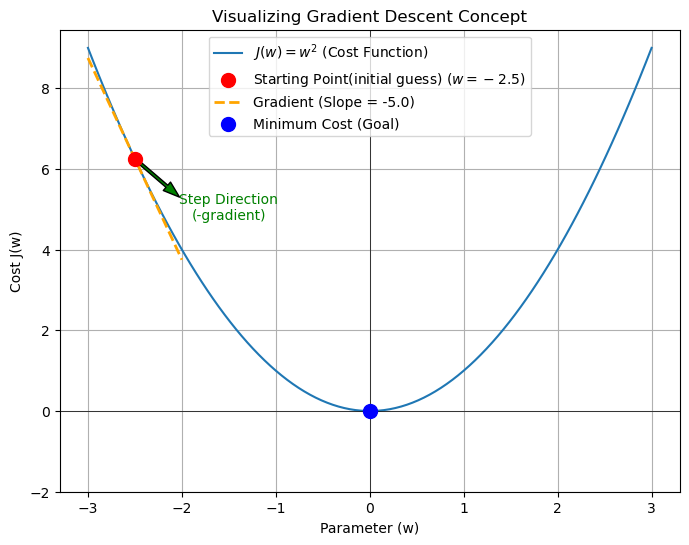

Starting w: -2.5
Cost at start: 6.25
Gradient at start: -5.00
Gradient descent aims to take steps from the starting point
in the opposite direction of the gradient (slope)
to reach the minimum point (w=0).


In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Simple cost function for demonstration -  in this case a Parabola
def cost_function(w):
  """Calculates the cost for a given parameter w."""
  return w**2

# Define the gradient (derivative) of the cost function (We can easily double check this with basic calculus)   
def gradient(w):
  """Calculates the gradient of the cost function at w."""
  return 2 * w
# Gradient descent is a method to find the minimum of a function
w_values = np.linspace(-3, 3, 100) 
cost_values = cost_function(w_values) 

'''We need an iniaal guess for w to start the gradient descent. The idea is to use the sign of the gradient to determine the direction of the step. 
If it is positive, we move left (decrease w) as moving to the right takes us uphill and we do not want that, and if it is negative, we move right (increase w). The step size is determined by the learning rate and we'll show 
how later in this book.'''
w_start = -2.5
cost_start = cost_function(w_start)
gradient_start = gradient(w_start)
plt.figure(figsize=(8, 6))

plt.plot(w_values, cost_values, label='$J(w) = w^2$ (Cost Function)')

# Plot the starting point
plt.scatter(w_start, cost_start, color='red', s=100, zorder=5, label=f'Starting Point(initial guess) ($w={w_start}$)')

# Plot the tangent line at the starting point
# Tangent line equation: y = gradient * (x - x_start) + y_start
tangent_x = np.linspace(w_start - 0.5, w_start + 0.5, 10) # Small segment around w_start
tangent_y = gradient_start * (tangent_x - w_start) + cost_start
plt.plot(tangent_x, tangent_y, color='orange', linestyle='--', linewidth=2, label=f'Gradient (Slope = {gradient_start:.1f})')

step_direction = -gradient_start
arrow_end_w = w_start + step_direction * 0.1 
arrow_end_cost = cost_function(arrow_end_w) 

plt.annotate('',
             xy=(w_start - 0.1 * gradient_start, cost_start - 1), 
             xytext=(w_start, cost_start),         
             arrowprops=dict(facecolor='green', shrink=0.05, width=2, headwidth=8),
             label='Direction to move (-gradient)' 
            )
plt.text(w_start - 0.2 * gradient_start, cost_start - 1.5, 'Step Direction\n(-gradient)', color='green', ha='center')


# Mark the minimum
plt.scatter(0, 0, color='blue', s=100, zorder=5, label='Minimum Cost (Goal)')


plt.xlabel('Parameter (w)')
plt.ylabel('Cost J(w)')
plt.title('Visualizing Gradient Descent Concept')
plt.legend()
plt.grid(True)
plt.ylim(bottom=-2) 
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Show the plot
plt.show()

print(f"Starting w: {w_start}")
print(f"Cost at start: {cost_start:.2f}")
print(f"Gradient at start: {gradient_start:.2f}")
print("Gradient descent aims to take steps from the starting point")
print("in the opposite direction of the gradient (slope)")
print("to reach the minimum point (w=0).")

As shown in the code below; the choice of the learning rate greately affects the convergence of our algorithm. We can choose to use 

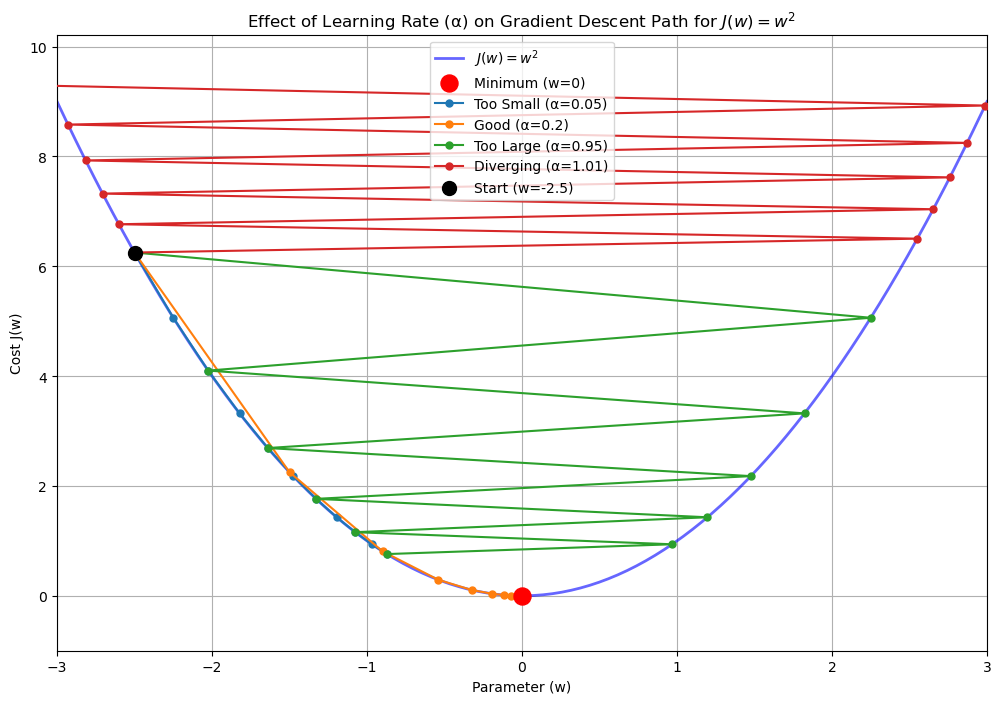

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Cost function J(w) = w^2
def cost_function(w):
  """Calculates the cost for a given parameter w."""
  return w**2 # Changed back to w^2

# Gradient (derivative) of the cost function: J'(w) = 2*w
def gradient(w):
  """Calculates the gradient of the cost function at w."""
  return 2 * w # Changed back to 2*w

# Gradient Descent Function - returns w history
def gradient_descent_tracker(w_start, learning_rate, epochs):
    """Performs gradient descent and returns the history of w values."""
    w = w_start
    w_history = [w] # Store the sequence of w values
    cost_history = [cost_function(w)] # Store corresponding costs
    for _ in range(epochs):
        grad = gradient(w)
        w = w - learning_rate * grad # Update rule
        w_history.append(w)
        cost_history.append(cost_function(w))
    return np.array(w_history), np.array(cost_history)

# --- Simulation Parameters ---
w_start = -2.5          # Starting point for w
epochs = 10             # Number of steps/iterations to show
learning_rates = {
    "Too Small (α=0.05)": 0.05,
    "Good (α=0.2)": 0.2,
    "Too Large (α=0.95)": 0.95,
    "Diverging (α=1.01)": 1.01
}

# --- Plotting Setup ---
plt.figure(figsize=(12, 8))

# Plot the cost function curve
w_values = np.linspace(-3, 3, 200) # Adjusted range for w^2
cost_values = cost_function(w_values)
plt.plot(w_values, cost_values, label='$J(w) = w^2$', linewidth=2, color='blue', alpha=0.6) # Updated label

plt.scatter(0, 0, color='red', s=150, zorder=5, label='Minimum (w=0)') # Updated minimum location

max_cost_observed = cost_function(w_start) # Keep track for ylim adjustment
for label, lr in learning_rates.items():
    w_hist, cost_hist = gradient_descent_tracker(w_start, lr, epochs)
    max_cost_observed = max(max_cost_observed, np.max(cost_hist)) # Update max cost if needed

    # Plot the path taken by gradient descent for this learning rate
    plt.plot(w_hist, cost_hist, marker='o', linestyle='-', markersize=5,
             label=f'{label}', zorder=3)


# Mark the overall starting point clearly
plt.scatter(w_start, cost_function(w_start), color='black', s=100, zorder=4, label=f'Start (w={w_start})')


# --- Add Labels and Title ---
plt.xlabel('Parameter (w)')
plt.ylabel('Cost J(w)')
plt.title('Effect of Learning Rate (α) on Gradient Descent Path for $J(w) = w^2$') # Updated title
plt.legend(loc='upper center')
plt.grid(True)
# Adjust plot limits
plt.ylim(bottom=-1, top=max(10, max_cost_observed*1.1)) # Adjusted ylim
plt.xlim(-3, 3) # Adjusted xlim

# Show the plot
plt.show()

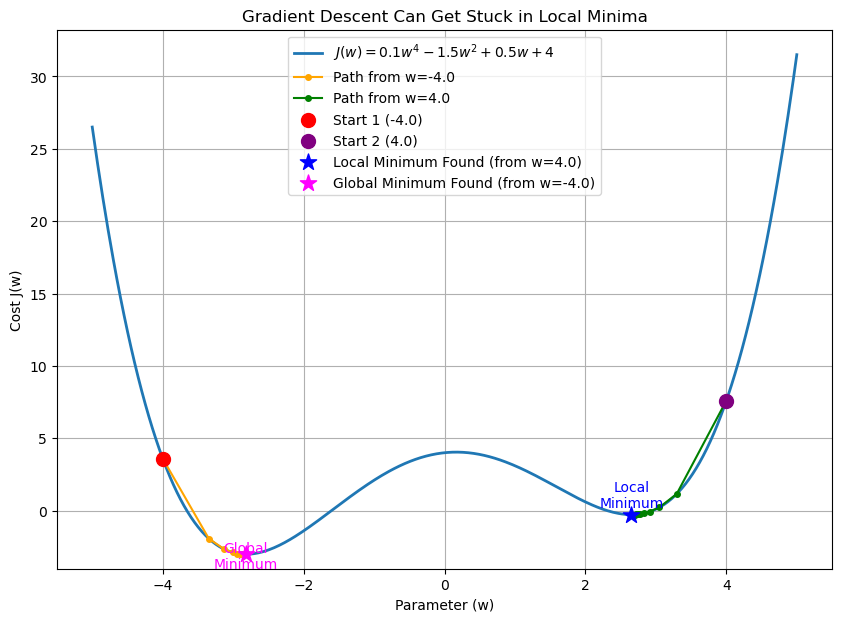

Path 1 started at w=-4.0 and ended near w=-2.8184 with cost -3.0145
Path 2 started at w=4.0 and ended near w=2.6511 with cost -0.2772
--------------------
Identified Local Minimum near w=2.6511 with cost -0.2772
Identified Global Minimum near w=-2.8184 with cost -3.0145


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Cost function with local and global minima
def cost_function_local_min(w):
  """J(w) = 0.1w^4 - 1.5w^2 + 0.5w + 4"""
  return 0.1*w**4 - 1.5*w**2 + 0.5*w + 4

# Gradient (derivative) of the cost function
def gradient_local_min(w):
  """J'(w) = 0.4w^3 - 3w + 0.5"""
  return 0.4*w**3 - 3.0*w + 0.5

# Gradient Descent Function - returns w history (same as before)
def gradient_descent_tracker(w_start, learning_rate, epochs, grad_func):
    """Performs gradient descent using grad_func and returns w history."""
    w = w_start
    w_history = [w]
    # Cost history calculation added for plotting convenience
    cost_history = [cost_function_local_min(w)]
    for _ in range(epochs):
        grad = grad_func(w) # Use the provided gradient function
        w = w - learning_rate * grad
        w_history.append(w)
        cost_history.append(cost_function_local_min(w)) # Store cost
    return np.array(w_history), np.array(cost_history)

# --- Simulation Parameters ---
learning_rate = 0.05  # A relatively small learning rate
epochs = 100         # Number of steps/iterations

# Starting points in different basins of attraction
w_start1 = -4.0 # Start in left basin
w_start2 = 4.0  # Start in right basin

# --- Run Gradient Descent ---
w_hist1, cost_hist1 = gradient_descent_tracker(w_start1, learning_rate, epochs, gradient_local_min)
w_hist2, cost_hist2 = gradient_descent_tracker(w_start2, learning_rate, epochs, gradient_local_min)

# --- Determine Final Points and Identify Global/Local ---
w_final1, cost_final1 = w_hist1[-1], cost_hist1[-1]
w_final2, cost_final2 = w_hist2[-1], cost_hist2[-1]

# Check which final cost is lower to correctly identify global minimum found
if cost_final1 < cost_final2:
    global_min_w, global_min_cost = w_final1, cost_final1
    local_min_w, local_min_cost = w_final2, cost_final2
    global_label_suffix = f'(from w={w_start1})'
    local_label_suffix = f'(from w={w_start2})'
else:
    global_min_w, global_min_cost = w_final2, cost_final2
    local_min_w, local_min_cost = w_final1, cost_final1
    global_label_suffix = f'(from w={w_start2})'
    local_label_suffix = f'(from w={w_start1})'


# --- Plotting Setup ---
plt.figure(figsize=(10, 7))

# Plot the cost function curve
w_values = np.linspace(-5, 5, 400)
cost_values = cost_function_local_min(w_values)
plt.plot(w_values, cost_values, label='$J(w) = 0.1w^4 - 1.5w^2 + 0.5w + 4$', linewidth=2)

# Plot the paths taken
plt.plot(w_hist1, cost_hist1, marker='o', linestyle='-', markersize=4, color='orange',
         label=f'Path from w={w_start1}')
plt.plot(w_hist2, cost_hist2, marker='o', linestyle='-', markersize=4, color='green',
         label=f'Path from w={w_start2}')

# Mark starting points
plt.scatter(w_start1, cost_function_local_min(w_start1), color='red', s=100, zorder=5,
            label=f'Start 1 ({w_start1})')
plt.scatter(w_start2, cost_function_local_min(w_start2), color='purple', s=100, zorder=5,
            label=f'Start 2 ({w_start2})')

# Mark and label the identified minima correctly
plt.scatter(local_min_w, local_min_cost, color='blue', marker='*', s=150, zorder=4,
            label=f'Local Minimum Found {local_label_suffix}')
plt.scatter(global_min_w, global_min_cost, color='magenta', marker='*', s=150, zorder=4,
            label=f'Global Minimum Found {global_label_suffix}')

# Add text annotations next to the correct minimum
plt.text(local_min_w, local_min_cost + 0.5, 'Local\nMinimum', ha='center', color='blue')
plt.text(global_min_w, global_min_cost - 1.0, 'Global\nMinimum', ha='center', color='magenta')


# --- Add Labels and Title ---
plt.xlabel('Parameter (w)')
plt.ylabel('Cost J(w)')
plt.title('Gradient Descent Can Get Stuck in Local Minima')
plt.legend()
plt.grid(True)
plt.ylim(bottom=min(cost_values)-1) # Adjust y-limit

# Show the plot
plt.show()

print(f"Path 1 started at w={w_start1} and ended near w={w_final1:.4f} with cost {cost_final1:.4f}")
print(f"Path 2 started at w={w_start2} and ended near w={w_final2:.4f} with cost {cost_final2:.4f}")
print("-" * 20)
print(f"Identified Local Minimum near w={local_min_w:.4f} with cost {local_min_cost:.4f}")
print(f"Identified Global Minimum near w={global_min_w:.4f} with cost {global_min_cost:.4f}")

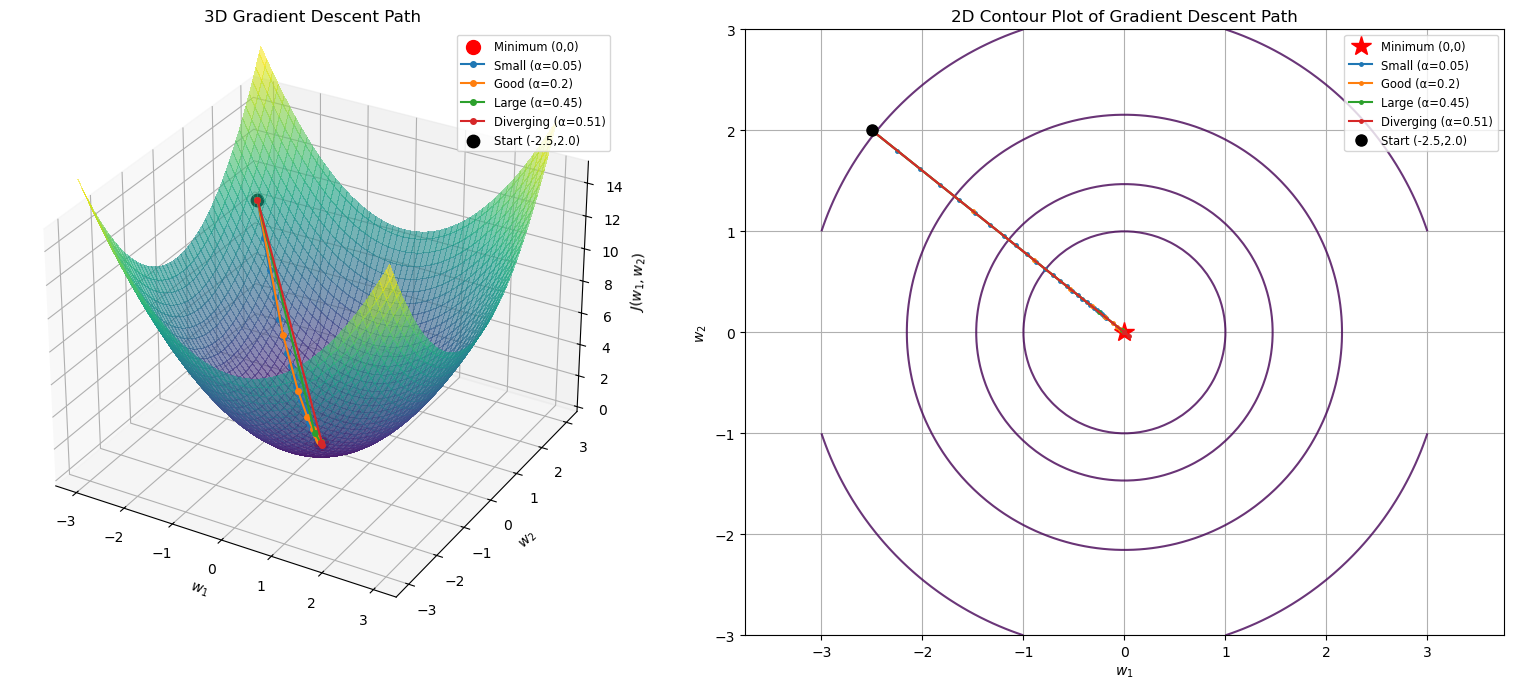

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Import the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

# Cost function J(w1, w2) = w1^2 + w2^2
def cost_function_3d(w1, w2):
  """Calculates the cost for given parameters w1, w2."""
  return w1**2 + w2**2

# Gradient (partial derivatives) of the cost function
# dJ/dw1 = 2*w1
# dJ/dw2 = 2*w2
def gradient_3d(w1, w2):
  """Calculates the gradient [dJ/dw1, dJ/dw2] of the cost function."""
  return 2 * w1, 2 * w2

# Gradient Descent Function for 2 parameters - returns history
def gradient_descent_tracker_3d(w1_start, w2_start, learning_rate, epochs):
    """Performs gradient descent for 2 params and returns their history."""
    w1, w2 = w1_start, w2_start
    w1_history = [w1]
    w2_history = [w2]

    for _ in range(epochs):
        grad_w1, grad_w2 = gradient_3d(w1, w2)
        w1 = w1 - learning_rate * grad_w1 # Update w1
        w2 = w2 - learning_rate * grad_w2 # Update w2
        w1_history.append(w1)
        w2_history.append(w2)
    return np.array(w1_history), np.array(w2_history)

# --- Simulation Parameters ---
w1_start, w2_start = -2.5, 2.0  # Starting point (w1, w2)
epochs = 25                     # Number of steps/iterations
learning_rates_3d = {
    "Small (α=0.05)": 0.05,
    "Good (α=0.2)": 0.2,
    "Large (α=0.45)": 0.45,     # Near stability limit for J=w1^2+w2^2 (limit is 0.5)
    "Diverging (α=0.51)": 0.51 # Should diverge
}

# --- Plotting Setup ---

# 1. Create data for the 3D surface plot
w1_range = np.linspace(-3, 3, 100)
w2_range = np.linspace(-3, 3, 100)
W1, W2 = np.meshgrid(w1_range, w2_range) # Create grid
J = cost_function_3d(W1, W2)             # Calculate cost J for each point on grid

# Create the figure with two subplots (3D surface and 2D contour)
fig = plt.figure(figsize=(16, 7))

# --- Subplot 1: 3D Surface Plot ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(W1, W2, J, cmap='viridis', alpha=0.6, # Use colormap and transparency
                       linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5) # Optional colorbar

# Plot the minimum point
ax1.scatter(0, 0, 0, color='red', s=100, depthshade=True, label='Minimum (0,0)', zorder=10)

# Run GD and plot paths on 3D surface
max_z = cost_function_3d(w1_start, w2_start) # For adjusting plot limits
for label, lr in learning_rates_3d.items():
    w1_hist, w2_hist = gradient_descent_tracker_3d(w1_start, w2_start, lr, epochs)
    cost_hist = cost_function_3d(w1_hist, w2_hist)
    max_z = max(max_z, np.max(cost_hist[np.isfinite(cost_hist)])) # Update max z observed (handle divergence)

    # Plot the 3D path
    ax1.plot(w1_hist, w2_hist, cost_hist, marker='o', linestyle='-', markersize=4,
             label=label, zorder=5) # zorder helps keep minimum visible

# Mark the starting point
start_cost = cost_function_3d(w1_start, w2_start)
ax1.scatter(w1_start, w2_start, start_cost, color='black', s=80, depthshade=True, label=f'Start ({w1_start},{w2_start})', zorder=10)

ax1.set_xlabel('$w_1$')
ax1.set_ylabel('$w_2$')
ax1.set_zlabel('$J(w_1, w_2)$')
ax1.set_title('3D Gradient Descent Path')
# Adjust view angle if desired
# ax1.view_init(elev=30., azim=-60)
ax1.set_zlim(0, max(15, max_z * 1.1)) # Adjust z limit
ax1.legend(fontsize='small')


# --- Subplot 2: 2D Contour Plot ---
ax2 = fig.add_subplot(1, 2, 2)
# Plot contour lines
contour = ax2.contour(W1, W2, J, levels=np.logspace(0, 3, 10), cmap='viridis', alpha=0.8) # Log levels often look good
# ax2.clabel(contour, inline=1, fontsize=8) # Optional contour labels

# Plot the minimum point
ax2.plot(0, 0, 'r*', markersize=15, label='Minimum (0,0)') # Use star for minimum

# Run GD and plot paths on 2D contour
for label, lr in learning_rates_3d.items():
    w1_hist, w2_hist = gradient_descent_tracker_3d(w1_start, w2_start, lr, epochs)
    # Plot the 2D path (w1 vs w2)
    ax2.plot(w1_hist, w2_hist, marker='.', linestyle='-', markersize=5, label=label)

# Mark the starting point
ax2.plot(w1_start, w2_start, 'ko', markersize=8, label=f'Start ({w1_start},{w2_start})')

ax2.set_xlabel('$w_1$')
ax2.set_ylabel('$w_2$')
ax2.set_title('2D Contour Plot of Gradient Descent Path')
ax2.axis('equal') 
ax2.grid(True)
ax2.legend(fontsize='small')


plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

Therefore, gradient descent is a convinient way of to optimize cost function. In the next notebook, I'll utilize that in a regression algorithm.